# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | grand baie
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | kone
Processing Record 5 of Set 1 | zangguy
City not found. Skipping...
Processing Record 6 of Set 1 | mersa matruh
Processing Record 7 of Set 1 | st. john's
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | chernyshevsk
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | el granada
Processing Record 15 of Set 1 | genhe
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | cham

[{'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': -11.31,
  'Humidity': 74,
  'Cloudiness': 10,
  'Wind Speed': 5.36,
  'Country': 'US',
  'Date': ['dt']},
 {'City': 'grand baie',
  'Lat': -20.0182,
  'Lng': 57.5802,
  'Max Temp': 27.47,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 2.68,
  'Country': 'MU',
  'Date': ['dt']},
 {'City': 'port alfred',
  'Lat': -33.5906,
  'Lng': 26.891,
  'Max Temp': 20.1,
  'Humidity': 97,
  'Cloudiness': 3,
  'Wind Speed': 0.45,
  'Country': 'ZA',
  'Date': ['dt']},
 {'City': 'kone',
  'Lat': -21.0595,
  'Lng': 164.8658,
  'Max Temp': 26.99,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 2.52,
  'Country': 'NC',
  'Date': ['dt']},
 {'City': 'mersa matruh',
  'Lat': 31.3525,
  'Lng': 27.2453,
  'Max Temp': 12.11,
  'Humidity': 76,
  'Cloudiness': 40,
  'Wind Speed': 0,
  'Country': 'EG',
  'Date': ['dt']},
 {'City': "st. john's",
  'Lat': 47.5649,
  'Lng': -52.7093,
  'Max Temp': -5.68,
  'Humidity': 80,
  'Cloudin

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          70
Lat           70
Lng           70
Max Temp      70
Humidity      70
Cloudiness    70
Wind Speed    70
Country       70
Date          70
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,0.91,92,100,0.51,US,[dt]
1,grand baie,-20.0182,57.5802,26.36,82,81,4.74,MU,[dt]
2,port alfred,-33.5906,26.8910,18.99,91,3,0.45,ZA,[dt]
3,kone,-21.0595,164.8658,32.15,50,94,1.92,NC,[dt]
4,mersa matruh,31.3525,27.2453,13.11,71,0,2.06,EG,[dt]


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.91,92,100,0.51,US,['dt']
1,grand baie,-20.0182,57.5802,26.36,82,81,4.74,MU,['dt']
2,port alfred,-33.5906,26.8910,18.99,91,3,0.45,ZA,['dt']
3,kone,-21.0595,164.8658,32.15,50,94,1.92,NC,['dt']
4,mersa matruh,31.3525,27.2453,13.11,71,0,2.06,EG,['dt']


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

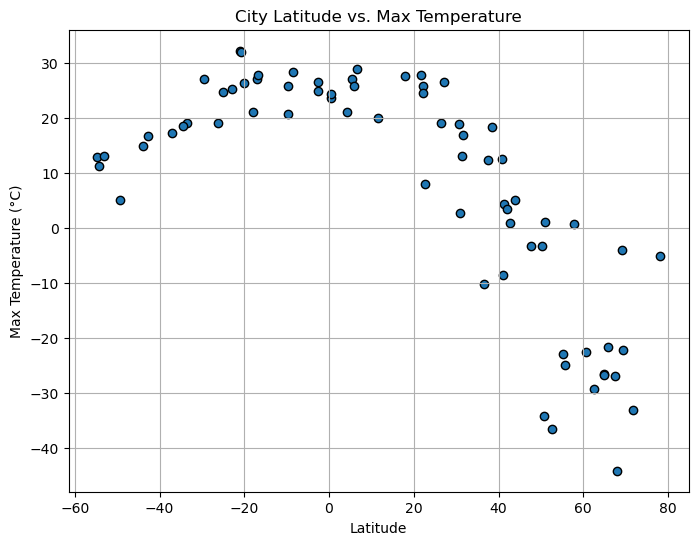

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

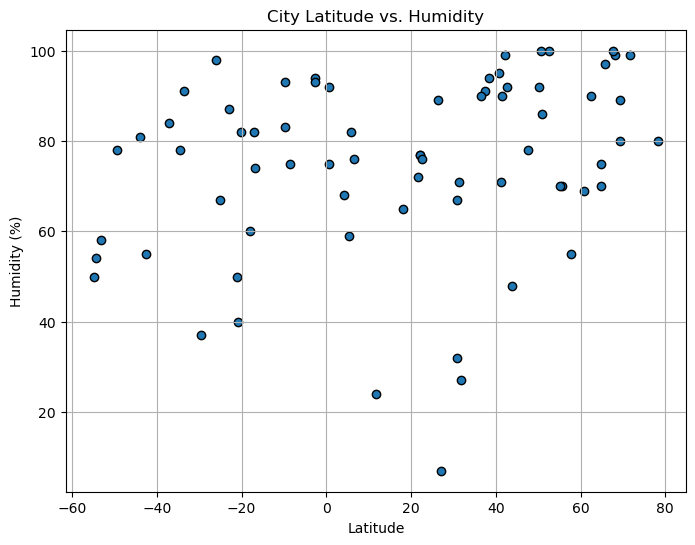

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

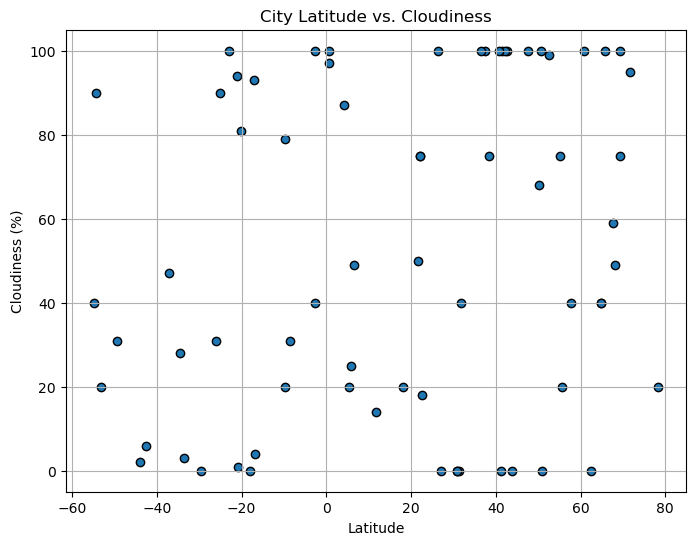

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

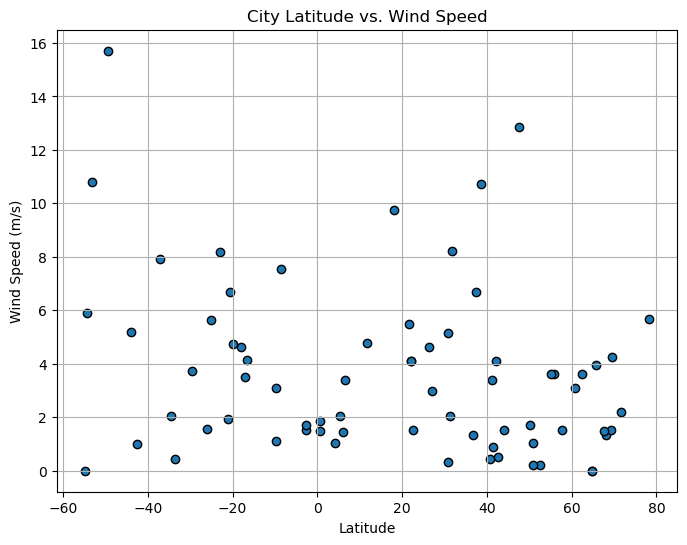

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(
    city_data_df["Lat"], city_data_df["Max Temp"])

print(f"Slope: {slope}, Intercept: {intercept}, R-value: {r_value}")




Slope: -0.38333027537903347, Intercept: 14.393336898227492, R-value: -0.708055675670471


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.91,92,100,0.51,US,['dt']
4,mersa matruh,31.3525,27.2453,13.11,71,0,2.06,EG,['dt']
5,st. john's,47.5649,-52.7093,-3.35,78,100,12.86,CA,['dt']
6,georgetown,5.4112,100.3354,26.96,59,20,2.06,MY,['dt']
7,tiksi,71.6872,128.8694,-33.15,99,95,2.19,RU,['dt']


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grand baie,-20.0182,57.5802,26.36,82,81,4.74,MU,['dt']
2,port alfred,-33.5906,26.8910,18.99,91,3,0.45,ZA,['dt']
3,kone,-21.0595,164.8658,32.15,50,94,1.92,NC,['dt']
8,waitangi,-43.9535,-176.5597,14.83,81,2,5.18,NZ,['dt']
9,grytviken,-54.2811,-36.5092,11.24,54,90,5.91,GS,['dt']


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7142


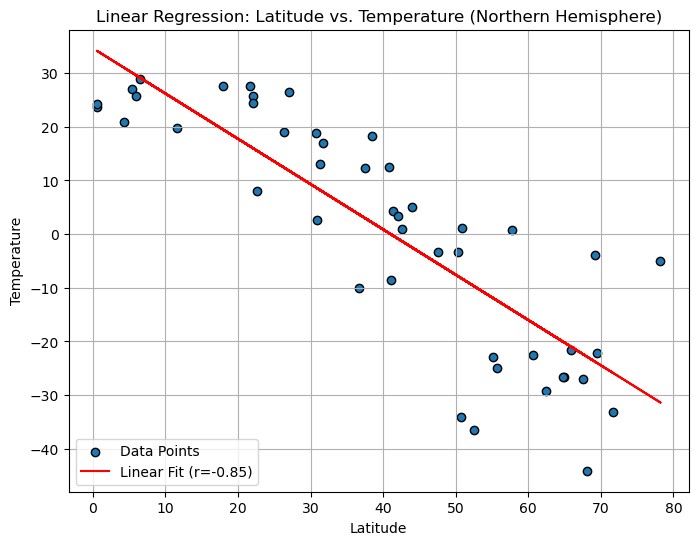

In [63]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
        northern_hemi_df["Lat"], northern_hemi_df["Max Temp"]
)

regression_values = slope * northern_hemi_df["Lat"] + intercept

plt.figure(figsize=(8,6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black", label="Data Points")
plt.plot(northern_hemi_df["Lat"], regression_values, color="red", label=f"Linear Fit (r={r_value:.2f})") # regression line

plt.title("Linear Regression: Latitude vs. Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.legend(loc='lower left')
plt.grid(True)


print(f"The r^2-value is: {r_value**2:.4f}")
plt.show()


The r^2-value is: 0.6357


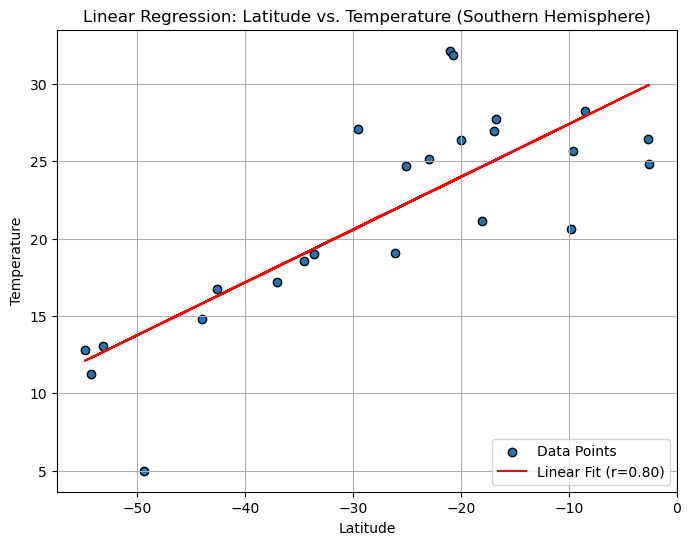

In [61]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df["Lat"], southern_hemi_df["Max Temp"]
)

regression_values_sh = slope * southern_hemi_df["Lat"] + intercept

plt.figure(figsize=(8,6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black", label="Data Points")
plt.plot(southern_hemi_df["Lat"], regression_values_sh, color="red", label=f"Linear Fit (r={r_value:.2f})") # regression line

plt.title("Linear Regression: Latitude vs. Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.legend(loc='lower right')
plt.grid(True)




print(f"The r^2-value is: {r_value**2:.4f}")
plt.show()




**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.1111


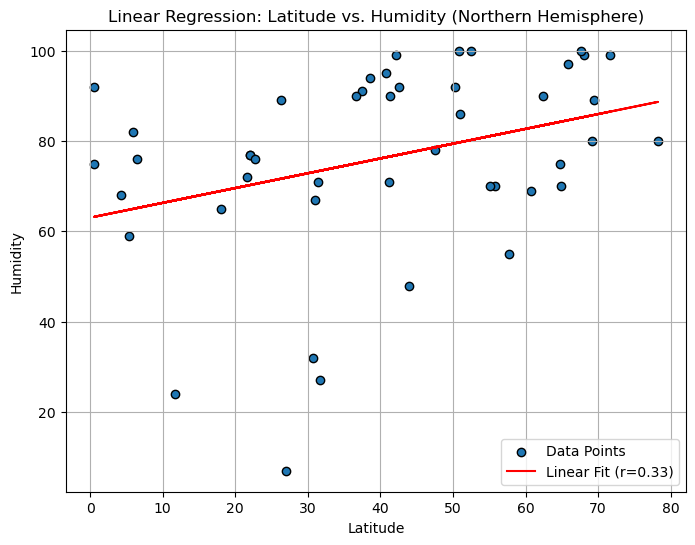

In [39]:
# Northern Hemisphere

slope, intercept, r_value, p_value, std_err = linregress(
        northern_hemi_df["Lat"], northern_hemi_df["Humidity"]
)

regression_values = slope * northern_hemi_df["Lat"] + intercept 

plt.figure(figsize=(8,6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black", label="Data Points")
plt.plot(northern_hemi_df["Lat"], regression_values, color="red", label=f"Linear Fit (r={r_value:.2f})")

plt.title("Linear Regression: Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend(loc='lower right')
plt.grid(True)

print(f"The r^2-value is: {r_value**2:.4f}")
plt.show()


The r^2-value is: 0.1669


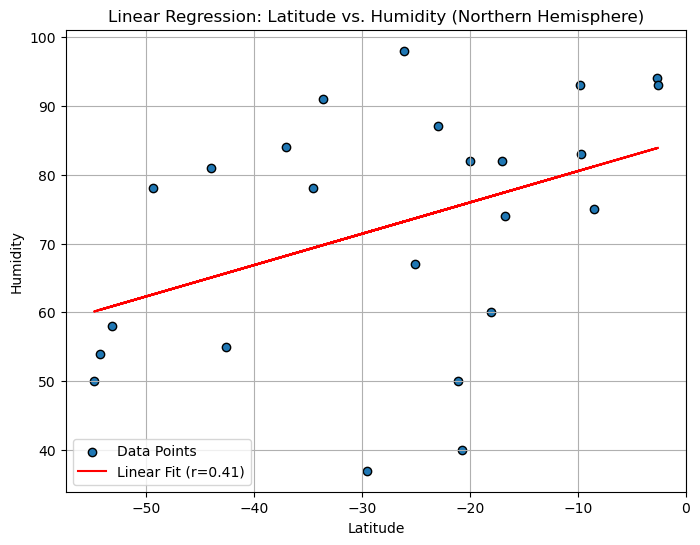

In [ ]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df["Lat"], southern_hemi_df["Humidity"]
)

regression_values = slope * southern_hemi_df["Lat"] + intercept 

plt.figure(figsize=(8,6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black", label="Data Points")
plt.plot(southern_hemi_df["Lat"], regression_values, color="red", label=f"Linear Fit (r={r_value:.2f})")

plt.title("Linear Regression: Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend(loc='lower left')
plt.grid(True)

print(f"The r^2-value is: {r_value**2:.4f}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.00858758709044306


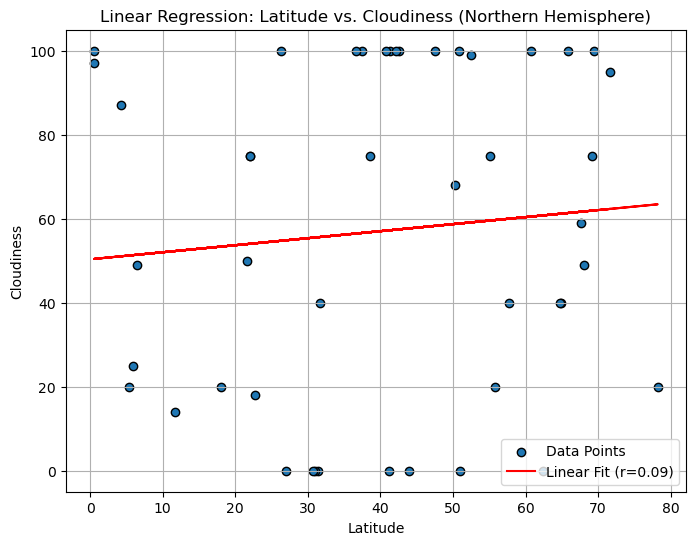

In [42]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
        northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"]
)

regression_values = slope * northern_hemi_df["Lat"] + intercept 

plt.figure(figsize=(8,6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="black", label="Data Points")
plt.plot(northern_hemi_df["Lat"], regression_values, color="red", label=f"Linear Fit (r={r_value:.2f})")

plt.title("Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend(loc='lower right')
plt.grid(True)

print(f"The r^2-value is: {r_value**2}")
plt.show()

The r^2-value is: 0.0478


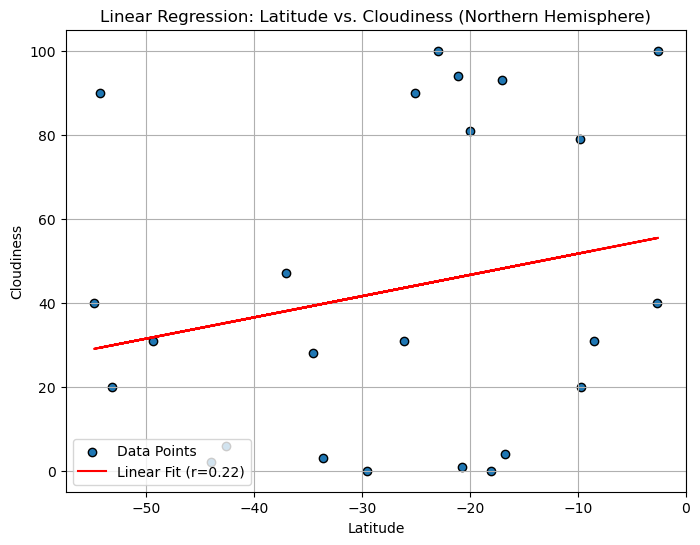

In [ ]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"]
)

regression_values = slope * southern_hemi_df["Lat"] + intercept 

plt.figure(figsize=(8,6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black", label="Data Points")
plt.plot(southern_hemi_df["Lat"], regression_values, color="red", label=f"Linear Fit (r={r_value:.2f})")

plt.title("Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend(loc='lower left')
plt.grid(True)

print(f"The r^2-value is: {r_value**2:.4f}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.008486067073173563


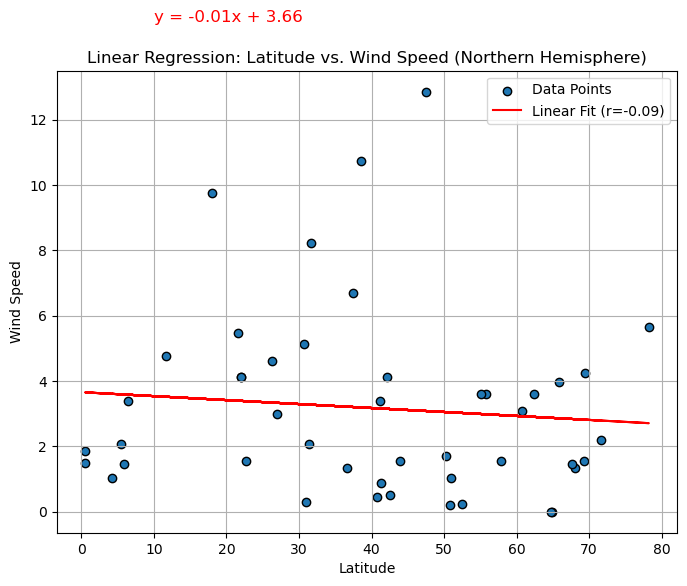

In [64]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
        northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"]
)

regression_values = slope * northern_hemi_df["Lat"] + intercept 

plt.figure(figsize=(8,6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black", label="Data Points")
plt.plot(northern_hemi_df["Lat"], regression_values, color="red", label=f"Linear Fit (r={r_value:.2f})")

plt.title("Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend(loc='upper right')
plt.grid(True)

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x=10, y=15, s=equation_text, fontsize=12, color='red')

print(f"The r^2-value is: {r_value**2}")
plt.show()

The r^2-value is: 0.1031


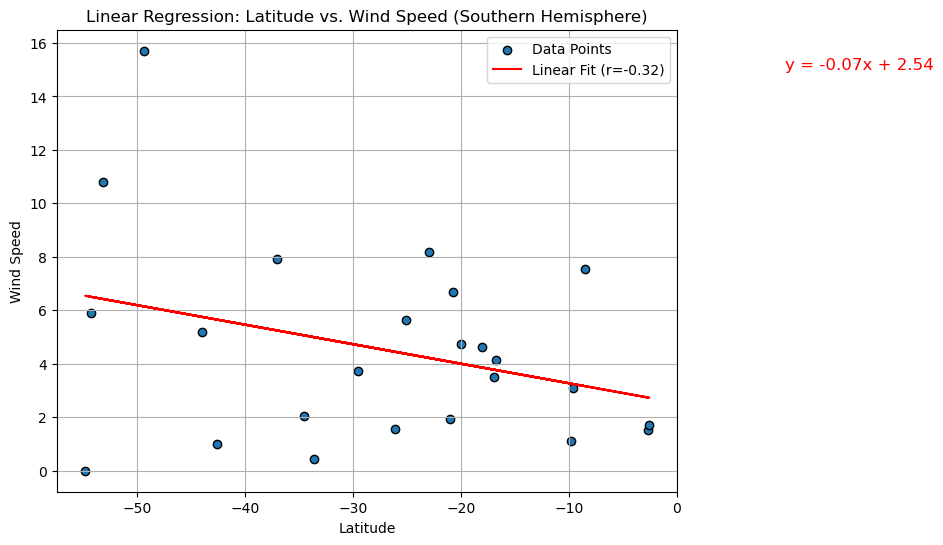

In [65]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"]
)

regression_values = slope * southern_hemi_df["Lat"] + intercept 

plt.figure(figsize=(8,6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black", label="Data Points")
plt.plot(southern_hemi_df["Lat"], regression_values, color="red", label=f"Linear Fit (r={r_value:.2f})")

plt.title("Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend(loc='upper right')
plt.grid(True)

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x=10, y=15, s=equation_text, fontsize=12, color='red')

print(f"The r^2-value is: {r_value**2:.4f}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE